<a href="https://colab.research.google.com/github/areesha-del/AI-ML-Hands-on/blob/main/WEEK_4%2C_DAY(2)__CLASSWORK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MLP AND CNN MODEL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Number of classes:", len(class_names))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)
Number of classes: 10


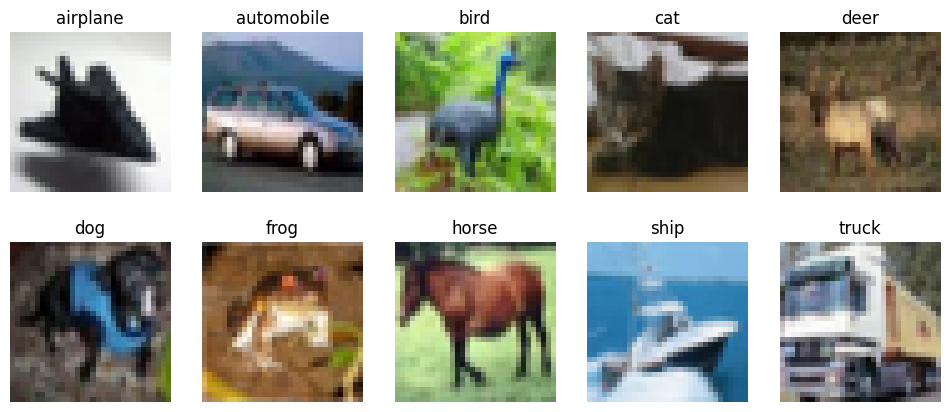

In [ ]:
plt.figure(figsize=(12,5))

for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx])
    plt.title(class_names[i])
    plt.axis('off')

plt.show()


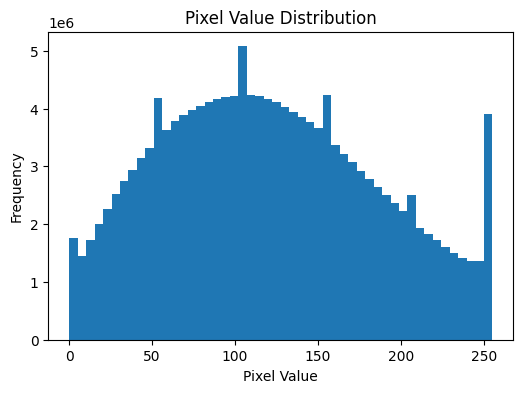

Min pixel: 0
Max pixel: 255


In [ ]:
plt.figure(figsize=(6,4))
plt.hist(X_train.flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

print("Min pixel:", X_train.min())
print("Max pixel:", X_train.max())


In [ ]:
memory_before = X_train.nbytes / (1024**2)
print("Memory before preprocessing: %.2f MB" % memory_before)


Memory before preprocessing: 146.48 MB


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42)


In [ ]:
memory_after = X_train.nbytes / (1024**2)
print("Memory after preprocessing: %.2f MB" % memory_after)


Memory after preprocessing: 468.75 MB


In [ ]:
X_train_flat = X_train.reshape(-1, 3072)
X_val_flat = X_val.reshape(-1, 3072)
X_test_flat = X_test.reshape(-1, 3072)


**MODEL 1**

In [ ]:
mlp = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()

history_mlp = mlp.fit(
    X_train_flat, y_train_cat,
    validation_data=(X_val_flat, y_val_cat),
    epochs=20,
    batch_size=64
)

mlp_time = time.time() - start
print("MLP Training Time:", mlp_time)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2517 - loss: 2.0543 - val_accuracy: 0.3772 - val_loss: 1.7272
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3804 - loss: 1.7209 - val_accuracy: 0.4020 - val_loss: 1.6548
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4157 - loss: 1.6312 - val_accuracy: 0.4188 - val_loss: 1.5952
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4352 - loss: 1.5685 - val_accuracy: 0.4450 - val_loss: 1.5600
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4564 - loss: 1.5172 - val_accuracy: 0.4457 - val_loss: 1.5681
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4743 - loss: 1.4798 - val_accuracy: 0.4500 - val_loss: 1.5211
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4808 - loss: 1.4394 - val_accuracy: 0.4725 - val_loss: 1.4764
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4959 - loss: 1.4140 - val_accuracy: 0.

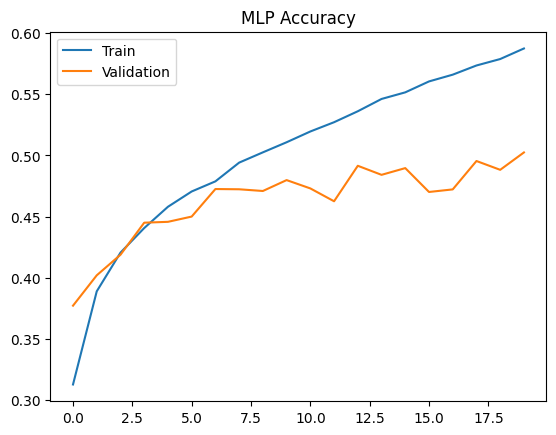

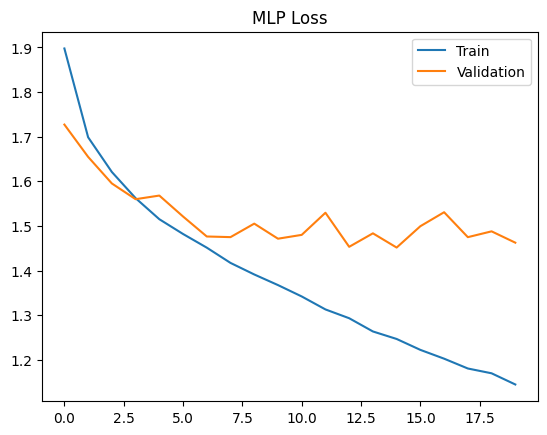

In [ ]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("MLP Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("MLP Loss")
plt.legend(["Train","Validation"])
plt.show()


In [ ]:
mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test_flat, y_test_cat)

print("MLP Test Accuracy:", mlp_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5010 - loss: 1.4473
MLP Test Accuracy: 0.5004000067710876


**MODEL 2**

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(MaxPooling2D())
cnn.add(BatchNormalization())

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(BatchNormalization())

cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,586 (627.29 KB)

 Trainable params: 160,394 (626.54 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
start = time.time()

history_cnn = cnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=64
)

cnn_time = time.time() - start
print("CNN Training Time:", cnn_time)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3442 - loss: 1.8207 - val_accuracy: 0.4774 - val_loss: 1.4089
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5253 - loss: 1.3265 - val_accuracy: 0.5530 - val_loss: 1.2865
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5959 - loss: 1.1401 - val_accuracy: 0.5568 - val_loss: 1.2516
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6451 - loss: 1.0071 - val_accuracy: 0.6331 - val_loss: 1.0773
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6804 - loss: 0.9116 - val_accuracy: 0.6062 - val_loss: 1.2059
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7074 - loss: 0.8402 - val_accuracy: 0.6902 - val_loss: 0.8948
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7352 - loss: 0.7535 - val_accuracy: 0.6586 - val_loss: 0.9873
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7607 - loss: 0.6754 - val_accuracy: 0

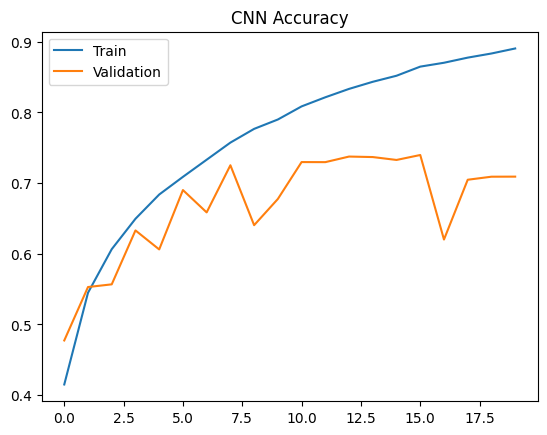

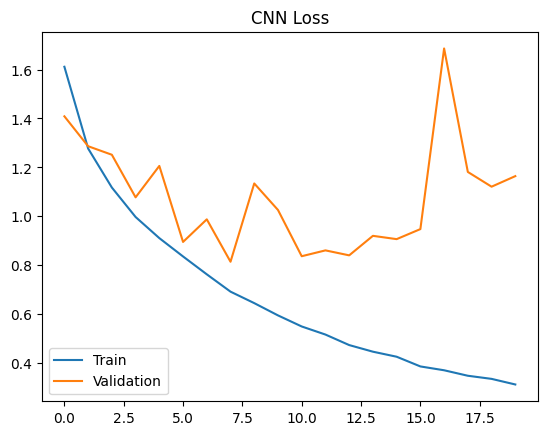

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title("CNN Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title("CNN Loss")
plt.legend(["Train","Validation"])
plt.show()


In [ ]:
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test, y_test_cat)

print("CNN Test Accuracy:", cnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7180 - loss: 1.1611
CNN Test Accuracy: 0.7128000259399414


**DATA AUGMENTATION**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)


In [ ]:
start = time.time()

history_aug = cnn.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    validation_data=(X_val, y_val_cat),
    epochs=20
)

aug_time = time.time() - start


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6993 - loss: 0.9454 - val_accuracy: 0.7040 - val_loss: 0.9350
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7250 - loss: 0.8310 - val_accuracy: 0.6945 - val_loss: 0.9758
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7369 - loss: 0.7787 - val_accuracy: 0.7139 - val_loss: 0.8683
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7486 - loss: 0.7501 - val_accuracy: 0.7425 - val_loss: 0.7662
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7576 - loss: 0.7267 - val_accuracy: 0.7191 - val_loss: 0.8664
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7546 - loss: 0.7296 - val_accuracy: 0.7484 - val_loss: 0.7528
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7604 - loss: 0.7119 - val_accuracy: 0.7129 - val_loss: 0.9073
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7658 - loss: 0.6994 - val_accurac

In [ ]:
comparison = pd.DataFrame({
    "Model": ["MLP","CNN"],
    "Accuracy": [mlp_test_acc, cnn_test_acc],
    "Training Time": [mlp_time, cnn_time],
})

print(comparison)


  Model  Accuracy  Training Time
0   MLP    0.5004      50.436705
1   CNN    0.7128      71.851929


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


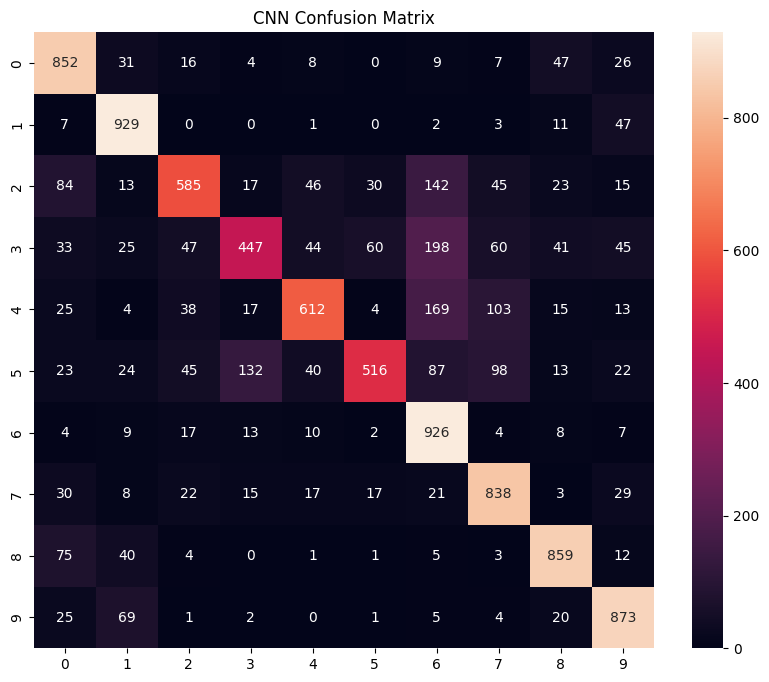

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("CNN Confusion Matrix")
plt.show()


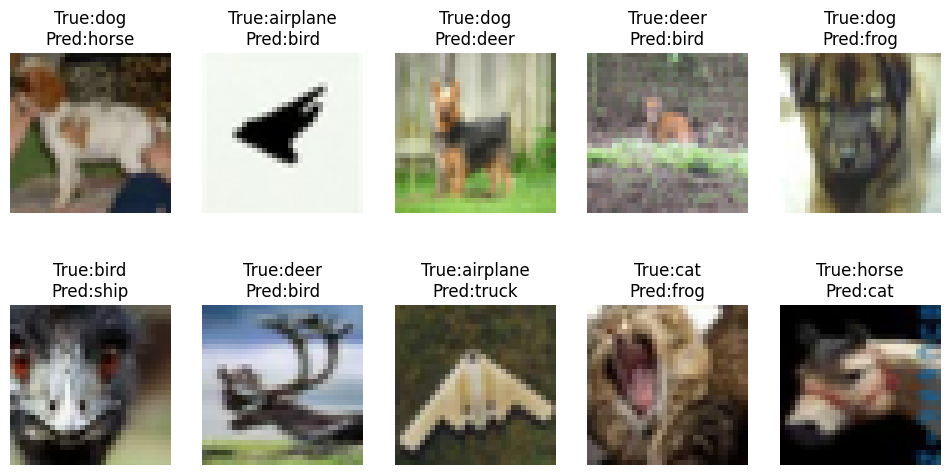

In [ ]:
misclassified = np.where(y_pred_classes != y_test.flatten())[0]

plt.figure(figsize=(12,6))

for i, idx in enumerate(misclassified[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True:{class_names[y_test[idx][0]]}\nPred:{class_names[y_pred_classes[idx]]}")
    plt.axis('off')

plt.show()
